# Simulation of Ball drop and Spring mass damper system
"Simulation of dynamic systems for dummies".
<img src="for_dummies.jpg" width="200" align="right">

This is a very simple description of how to do time simulations of a dynamic system using SciPy ODE (Ordinary Differnetial Equation) Solver.

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

## Simulation of a static system to introduce ODEint

Define a method that takes a system state and describe how this state will change in time. The method does this by returning time derivatives for each state. The ODE solver will use these time derivatives to calculate new states, for the next time step.

Here is a method that takes a system to simulate a train that travels with constant speed:

(The system has only one state, the position of the train)

In [2]:
V_start = 150*10**3/3600  # [m/s] Train velocity at start

def train(states,t):
    
    # states:
    # [x]
    
    x = states[0]  # Position of train
    dxdt = V_start # The position state will change by the speed of the train
    
    # Time derivative of the states:
    d_states_dt = np.array([dxdt])
    
    return d_states_dt

In [3]:
x_start = 0  # [m] Train position at start

# The states at start of the simulation, the train is traveling with constant speed V at position x = 0.
states_0 = np.array([x_start])

# Create a time vector for the simulation:
t = np.linspace(0,10,100)

# Simulate with the "train" method and start states for the times in t:
states = odeint(func = train,y0 = states_0,t = t)

# The result is the time series of the states:
x = states[:,0]


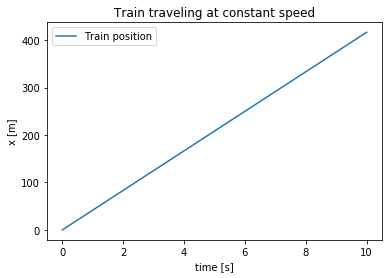

In [4]:
fig,ax = plt.subplots()
ax.plot(t,x,label = 'Train position')

ax.set_title('Train traveling at constant speed')
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')
a = ax.legend()


The speed can hower be a state too:

In [5]:
def train_2_states(states,t):
    
    # states:
    # [x,V]
    
    x = states[0]  # Position of train
    V = states[1]  # Speed of train
    dxdt = V  # The position state will change by the speed of the train
    dVdt = 0  # The velocity will not change (No acceleration)
    
    # Time derivative of the states:
    d_states_dt = np.array([dxdt,dVdt])
    
    return d_states_dt

In [6]:
# The states at start of the simulation, the train is traveling with constant speed V at position x = 0.
states_0 = np.array([x_start,V_start])

# Create a time vector for the simulation:
t = np.linspace(0,10,100)

# Simulate with the "train" method and start states for the times in t:
states = odeint(func = train_2_states,y0 = states_0,t = t)

# The result is the time series of the states:
x = states[:,0]
dxdt = states[:,1]


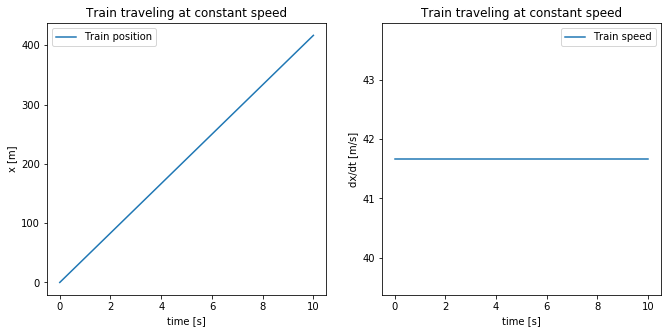

In [7]:
fig,axes = plt.subplots(ncols = 2)
fig.set_size_inches(11,5)
ax = axes[0]
ax.plot(t,x,label = 'Train position')

ax.set_title('Train traveling at constant speed')
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')
a = ax.legend()

ax = axes[1]
ax.plot(t,dxdt,label = 'Train speed')

ax.set_title('Train traveling at constant speed')
ax.set_xlabel('time [s]')
ax.set_ylabel('dx/dt [m/s]')
a = ax.legend()


## Ball drop
Here is a system where the speed is not constant.
A simulation of a ball drop under the influence of gravity force.

In [8]:
g = 9.81
m = 1

def ball_drop(states,t):
    
    # states:
    # [x,v]
    # F = g*m = m*dv/dt
    # --> dv/dt = (g*m) / m
    
    x = states[0]
    dxdt = states[1]
    
    dvdt = (g*m) / m
    
    d_states_dt = np.array([dxdt,dvdt])
    
    return d_states_dt

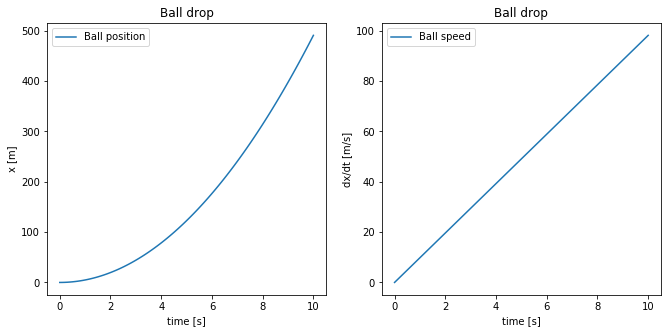

In [9]:
states_0 = np.array([0,0])
t = np.linspace(0,10,100)
states = odeint(func = ball_drop,y0 = states_0,t = t)
x = states[:,0]
dxdt = states[:,1]

fig,axes = plt.subplots(ncols = 2)
fig.set_size_inches(11,5)
ax = axes[0]
ax.plot(t,x,label = 'Ball position')

ax.set_title('Ball drop')
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')
a = ax.legend()

ax = axes[1]
ax.plot(t,dxdt,label = 'Ball speed')

ax.set_title('Ball drop')
ax.set_xlabel('time [s]')
ax.set_ylabel('dx/dt [m/s]')
a = ax.legend()

Simulating in air, where the ball has a resistance due aerodynamic drag.

In [10]:
cd = 0.01

def ball_drop_air(states,t):
    
    # states:
    # [x,u]
    # F = g*m - cd*u = m*du/dt
    # --> du/dt = (g*m - cd*u**2) / m
    
    x = states[0]
    u = states[1]
    dxdt = u
    
    dudt = (g*m - cd*u**2) / m
    
    d_states_dt = np.array([dxdt,dudt])
    
    return d_states_dt

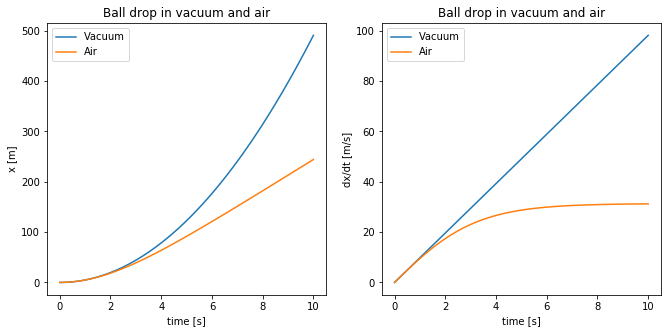

In [11]:
states = odeint(func = ball_drop_air,y0 = states_0,t = t)
x_air = states[:,0]
dxdt_air = states[:,1]

fig,axes = plt.subplots(ncols = 2)
fig.set_size_inches(11,5)
ax = axes[0]
ax.plot(t,x,label = 'Vacuum')
ax.plot(t,x_air,label = 'Air')

ax.set_title('Ball drop in vacuum and air')
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')
a = ax.legend()

ax = axes[1]
ax.plot(t,dxdt,label = 'Vacuum')
ax.plot(t,dxdt_air,label = 'Air')

ax.set_title('Ball drop in vacuum and air')
ax.set_xlabel('time [s]')
ax.set_ylabel('dx/dt [m/s]')
a = ax.legend()


The very classical dynamic system with a spring, a mass and a damper.
![title](spring_mass_damp.png)

In [12]:
k = 3  # The stiffnes of the spring (relates to position)
c = 0.1  # Damping term (relates to velocity)
m = 0.1  # The mass (relates to acceleration)

def spring_mass_damp(states,t):
    
    # states:
    # [x,v]
    # F = -k*x -c*v = m*dv/dt
    # --> dv/dt = (-kx -c*v) / m
    
    x = states[0]
    dxdt = states[1]
    
    dvdt = (-k*x -c*dxdt) / m
    
    d_states_dt = np.array([dxdt,dvdt])
    
    return d_states_dt

In [13]:
y0 = np.array([1,0])
t = np.linspace(0,10,100)
states = odeint(func = spring_mass_damp,y0 = y0,t = t)
x = states[:,0]
dxdt = states[:,1]

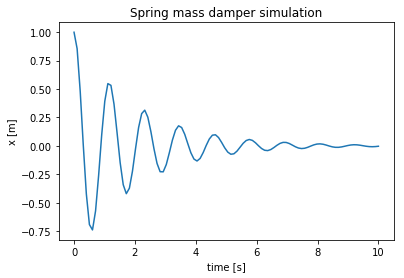

In [14]:
fig,ax = plt.subplots()
ax.plot(t,x)
ax.set_title('Spring mass damper simulation')
ax.set_xlabel('time [s]')
a = ax.set_ylabel('x [m]')


Also add a gravity force

In [15]:
g = 9.81

def spring_mass_damp_g(states,t):
    
    # states:
    # [x,v]
    # F = g*m -k*x -c*v = m*dv/dt
    # --> dv/dt = (g*m -kx -c*v) / m
    
    x = states[0]
    dxdt = states[1]
    
    dvdt = (g*m -k*x -c*dxdt) / m
    
    d_states_dt = np.array([dxdt,dvdt])
    
    return d_states_dt

In [16]:
states_g = odeint(func = spring_mass_damp_g,y0 = y0,t = t)
x_g = states_g[:,0]
dxdt_g = states_g[:,1]

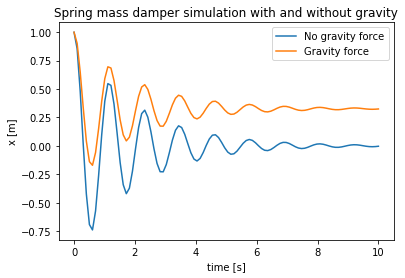

In [17]:
fig,ax = plt.subplots()
ax.plot(t,x,label = 'No gravity force')
ax.plot(t,x_g,label = 'Gravity force')

ax.set_title('Spring mass damper simulation with and without gravity')
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')
a = ax.legend()

## SymPy solution

In [18]:
import sympy as sym
import sympy.physics.mechanics as me

In [19]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax')

In [20]:
x, v = me.dynamicsymbols('x v')

In [21]:
m, c, k, g, t = sym.symbols('m c k g t')

In [22]:
ceiling  = me.ReferenceFrame('C')

In [23]:
O = me.Point('O')
P = me.Point('P')

In [24]:
O.set_vel(ceiling, 0)

In [25]:
P.set_pos(O, x * ceiling.x)
P.set_vel(ceiling, v * ceiling.x)
P.vel(ceiling)

v c_x

In [26]:
damping = -c * P.vel(ceiling)
stiffness = -k * P.pos_from(O)
gravity = m * g * ceiling.x
forces = damping + stiffness + gravity
forces

AttributeError: 'tuple' object has no attribute 'right'